In [2]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mean
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

print('Library loaded');

Library loaded


Initial data load(+ splitting test/train data) and analyze data structure

In [3]:
# Dataset Load
data = pd.read_csv('creditcard2.csv')
print(data.head())

# Split the dataset into features and labels
y = data['Class']
X = data.drop('Class', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fraud = data[data['Class'] == 1];
valid = data[data['Class'] == 0];
outlierFraction = len(fraud)/float(len(valid));
print("Outlier Fraction:", outlierFraction);
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])));
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])));
print("Amount details of the fraudulent transaction");


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

RandomForestClassifier Model

[[204   0]
 [  6  24]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       204
           1       1.00      0.80      0.89        30

    accuracy                           0.97       234
   macro avg       0.99      0.90      0.94       234
weighted avg       0.98      0.97      0.97       234

Overall Accuracy: 0.9743589743589743


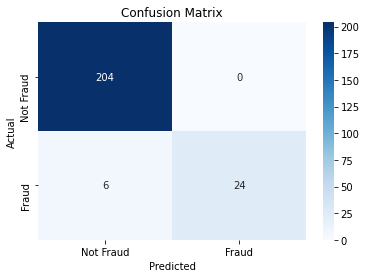

In [4]:
# Split the dataset into features and labels
y = data['Class']
X = data.drop('Class', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#Evaluate Accuracy
from sklearn.metrics import accuracy_score
# Make predictions on the test set
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Overall Accuracy:", accuracy)


#visualization
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"])


plt.show()


{'0': {'precision': 0.9714285714285714, 'recall': 1.0, 'f1-score': 0.9855072463768115, 'support': 204.0}, '1': {'precision': 1.0, 'recall': 0.8, 'f1-score': 0.888888888888889, 'support': 30.0}, 'accuracy': 0.9743589743589743, 'macro avg': {'precision': 0.9857142857142858, 'recall': 0.9, 'f1-score': 0.9371980676328502, 'support': 234.0}, 'weighted avg': {'precision': 0.9750915750915751, 'recall': 0.9743589743589743, 'f1-score': 0.9731202774681035, 'support': 234.0}}
['0', '1', 'accuracy', 'macro avg']


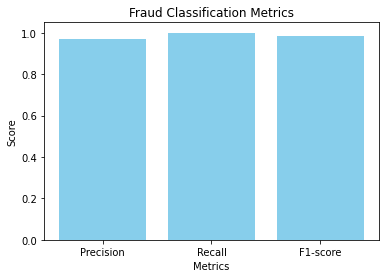

In [71]:
# Compute classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(report)

# Get the unique class labels
labels = list(report.keys())[:-1]  # Exclude the 'macro avg' and 'weighted avg' keys
print(labels)

# Find the index corresponding to the fraud class
fraud_index = labels.index('0')

# Extract metrics for fraud class
fraud_metrics = report[str(fraud_index)]

# Create lists for metrics and corresponding labels
metrics = ['Precision', 'Recall', 'F1-score']
scores = [fraud_metrics['precision'], fraud_metrics['recall'], fraud_metrics['f1-score']]

# Create a bar plot
plt.bar(metrics, scores, color='skyblue')

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Fraud Classification Metrics')

# Show the plot
plt.show()


Random Forest REgressor Model

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.022173076923076924


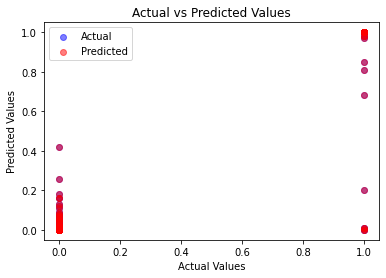

In [73]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual')
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


Conclusion(Model Accuracy Compare)

##### The overall accuracy for RandomForestClassifier Model was 0.9700854700854701 meanwhile, MSE(Mean Sqaured Error) for Random Forest Regressor Model was 0.022173076923076924, so with these results, Random Forest Regressor model seems to predict credit card fraud slightly better. However, due to limitation of resources, Only half data was used from original raw data. 